In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from scipy import odr 
import random as r

In [2]:
DATA_DIR = "../../data/cleaned-data/"

In [3]:
def perform_odr(test, years):
    # Create a sample feature array and a target array
    feature = np.array(test[years[0]]).reshape(1, -1)
    # shuffle the created array
    np.random.shuffle(feature)
    # create a target array of random numbers
    target = np.array(test[years[1]])

    # Define a function (quadratic in our case)
    # to fit the data with.
    # odr initially assumes a linear function
    def target_function(p, x):
        m, c = p
        return m*x + c

    #  model fitting.
    odr_model = odr.Model(target_function)

    # Create a Data object using sample data created.
    data = odr.Data(feature, target)

    # Set ODR with the model and data.
    ordinal_distance_reg = odr.ODR(data, odr_model,
                                   beta0=[0.2, 1.])

    # Run the regression.
    out = ordinal_distance_reg.run()

    # print the results
    out.pprint()
    
    return out.beta

In [4]:
data = pd.read_csv(DATA_DIR + "countyincome_gini_const.csv").sort_values(by=["GEOFIPS", "YEAR"])
data[:30]

,YEAR,GEOFIPS,GINI,NUM_RETURN,NUM_EXEMPT,AGI,WAGES_SALARIES,DIVIDENDS,INTEREST,TAXABLE_TOTAL
0,1989,1001,0.400131,13674.0,31869.0,333060.0,279230.0,3115.0,13269.0,295614.0
3063,1990,1001,0.400131,12883.0,31491.0,348492.0,294280.0,2408.0,13557.0,310245.0
6126,1991,1001,0.400131,13232.0,32322.0,373703.0,312277.0,2869.0,13587.0,328733.0
9189,1992,1001,0.400131,13451.0,32884.0,400451.0,334563.0,2844.0,11633.0,349040.0
12252,1993,1001,0.400131,13981.0,34001.0,424460.0,355122.0,3293.0,9924.0,368339.0
15315,1994,1001,0.400131,14403.0,34651.0,469020.0,380554.0,3525.0,10040.0,394119.0
18378,1995,1001,0.400131,15827.0,37724.0,513383.0,426436.0,3999.0,12713.0,443148.0
21441,1996,1001,0.411397,16523.0,39079.0,551423.0,456396.0,4967.0,14595.0,475958.0
24504,1997,1001,0.411397,16652.0,39524.0,584903.0,481158.0,5155.0,14320.0,500633.0
27567,1998,1001,0.411397,17072.0,40279.0,639624.0,516032.0,5133.0,15254.0,536419.0


In [5]:
data_comparison = data[data["YEAR"].isin([1995, 1996, 2005, 2006, 2010, 2011, 2015, 2016])][["YEAR", "GEOFIPS", "GINI"]]
data_comparison

,YEAR,GEOFIPS,GINI
18378,1995,1001,0.400131
21441,1996,1001,0.411397
49008,2005,1001,0.411397
52071,2006,1001,0.405000
64323,2010,1001,0.405000
...,...,...,...
55133,2006,56045,0.391000
67385,2010,56045,0.391000
70448,2011,56045,0.421600
82700,2015,56045,0.421600


In [6]:
test = pd.pivot_table(data_comparison, values='GINI', index=['GEOFIPS'],columns=['YEAR']).reset_index()
test

YEAR,GEOFIPS,1995,1996,2005,2006,2010,2011,2015,2016
0,1001,0.400131,0.411397,0.411397,0.405,0.405,0.4227,0.4227,0.4552
1,1003,0.425340,0.440502,0.440502,0.439,0.439,0.4564,0.4564,0.4566
2,1005,0.480382,0.509205,0.509205,0.464,0.464,0.4642,0.4642,0.5047
3,1007,0.452399,0.437101,0.437101,0.411,0.411,0.4410,0.4410,0.4500
4,1009,0.419520,0.418822,0.418822,0.422,0.422,0.4037,0.4037,0.4685
...,...,...,...,...,...,...,...,...,...
3058,56037,0.370816,0.364037,0.364037,0.379,0.379,0.3832,0.3832,0.4134
3059,56039,0.435177,0.541601,0.541601,0.485,0.485,0.4728,0.4728,0.5087
3060,56041,0.391688,0.364570,0.364570,0.400,0.400,0.4289,0.4289,0.3679
3061,56043,0.406486,0.444487,0.444487,0.455,0.455,0.4536,0.4536,0.3892


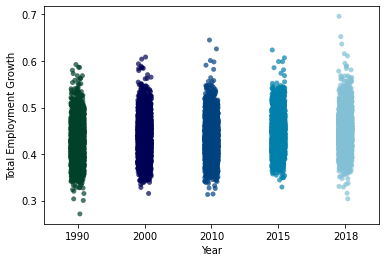

In [7]:
strip_data = data[data["YEAR"].isin([1990, 2000, 2010, 2015, 2018])][["YEAR", "GEOFIPS", "GINI"]]


fig, ax = plt.subplots()
sns.stripplot(data=strip_data, x="YEAR", y="GINI", jitter=True, 
              edgecolor='none', size=5, alpha=.70, palette='ocean')
# ax.set_xticks(["2015-2016", "2016-2017", "2017-2018"])
# sns.lineplot(x=[1990, 2000, 2010, 2015, 2018], y=strip_data.groupby("YEAR").mean()["GINI"])
plt.xlabel("Year")
plt.ylabel("Total Employment Growth");

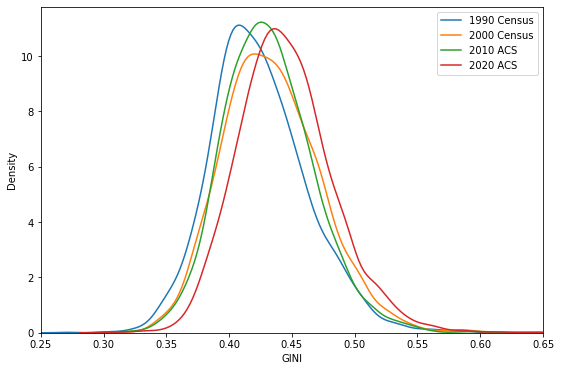

In [8]:
strip_data = data[data["YEAR"].isin([1990, 2000, 2010, 2015, 2018])][["YEAR", "GEOFIPS", "GINI"]]
plt.figure(figsize=(9, 6))
sns.kdeplot(strip_data[strip_data["YEAR"] == 1990]["GINI"], label="1990 Census")
sns.kdeplot(strip_data[strip_data["YEAR"] == 2000]["GINI"], label="2000 Census")
sns.kdeplot(strip_data[strip_data["YEAR"] == 2010]["GINI"], label="2010 ACS")
# sns.kdeplot(strip_data[strip_data["YEAR"] == 2015]["GINI"], label="2015 ACS")
sns.kdeplot(strip_data[strip_data["YEAR"] == 2018]["GINI"], label="2020 ACS")
plt.xlim(0.25, 0.65)
plt.legend()

In [9]:
strip_data.groupby("YEAR").mean()["GINI"]

YEAR
1990    0.423982
2000    0.434000
2010    0.431528
2015    0.442542
2018    0.445037
Name: GINI, dtype: float64

In [10]:
def plot_gini(year1, year2, color="tab:blue"):
    x = test[1995]
    y = test[1996]

    a, b = perform_odr(test, [1995, 1996])


    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, color=color)
    plt.plot(x, a*x + b, color=color)

    return a, b

Beta: [ 1.02458034e+00 -4.03675455e-04]
Beta Std Error: [0.01313746 0.00559001]
Beta Covariance: [[ 0.51770948 -0.21949861]
 [-0.21949861  0.09373228]]
Residual Variance: 0.0003333776139334812
Inverse Condition #: 0.025869139098097776
Reason(s) for Halting:
  Sum of squares convergence


(1.0245803391637691, -0.00040367545544618515)

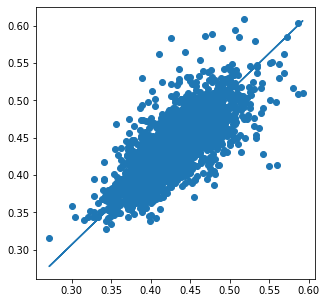

In [11]:
plot_gini(1995, 1996)

Beta: [ 1.16905088 -0.07231734]
Beta Std Error: [0.02105079 0.00933726]
Beta Covariance: [[ 0.85785918 -0.37963869]
 [-0.37963869  0.16877872]]
Residual Variance: 0.0005165599933220676
Inverse Condition #: 0.021228270689953428
Reason(s) for Halting:
  Sum of squares convergence
Beta: [0.90616916 0.03825023]
Beta Std Error: [0.01384311 0.00602903]
Beta Covariance: [[ 0.44810841 -0.19447913]
 [-0.19447913  0.08499854]]
Residual Variance: 0.0004276456379410929
Inverse Condition #: 0.02602985388618444
Reason(s) for Halting:
  Sum of squares convergence


(1.1690508765450225,
 -0.07231734467572656,
 0.9061691644385568,
 0.0382502259340313)

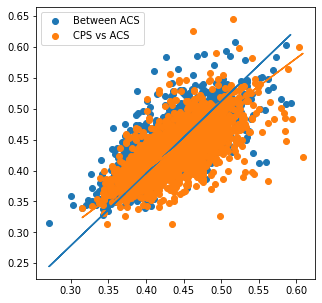

In [12]:
x_1 = test[1995]
y_1 = test[1996]

x_2 = test[2005]
y_2 = test[2006]

a_1, b_1 = perform_odr(test, [2015, 2016])
a_2, b_2 = perform_odr(test, [2005, 2006])

plt.figure(figsize=(5, 5))
plt.plot(x_1, a_1*x_1 + b_1)
plt.plot(x_2, a_2*x_2 + b_2, color="tab:orange")
plt.scatter(x_1, y_1, label="Between ACS")
plt.scatter(x_2, y_2, color="tab:orange", label="CPS vs ACS")

plt.legend()

a_1, b_1, a_2, b_2

Beta: [0.90616916 0.03825023]
Beta Std Error: [0.01384311 0.00602903]
Beta Covariance: [[ 0.44810841 -0.19447913]
 [-0.19447913  0.08499854]]
Residual Variance: 0.0004276456379410929
Inverse Condition #: 0.02602985388618444
Reason(s) for Halting:
  Sum of squares convergence


(0.9061691644385568, 0.0382502259340313)

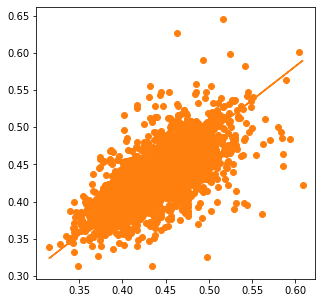

In [13]:
x = test[2005]
y = test[2006]

a, b = perform_odr(test, [2005, 2006])


plt.figure(figsize=(5, 5))
plt.scatter(x, y, color="tab:orange")
plt.plot(x, a*x + b, color="tab:orange")

a, b

Beta: [0.9294816 0.0414449]
Beta Std Error: [0.01465309 0.00634251]
Beta Covariance: [[ 0.53462742 -0.23070648]
 [-0.23070648  0.10016474]]
Residual Variance: 0.00040161231591846676
Inverse Condition #: 0.024109714713011654
Reason(s) for Halting:
  Sum of squares convergence


(0.9294815999658976, 0.04144490193931886)

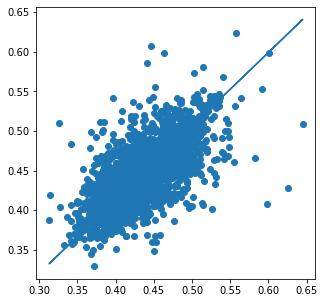

In [14]:
x = test[2010]
y = test[2011]

a, b = perform_odr(test, [2010, 2011])

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, a*x + b)

a, b

Beta: [ 1.16905088 -0.07231734]
Beta Std Error: [0.02105079 0.00933726]
Beta Covariance: [[ 0.85785918 -0.37963869]
 [-0.37963869  0.16877872]]
Residual Variance: 0.0005165599933220676
Inverse Condition #: 0.021228270689953428
Reason(s) for Halting:
  Sum of squares convergence


(1.1690508765450225, -0.07231734467572656)

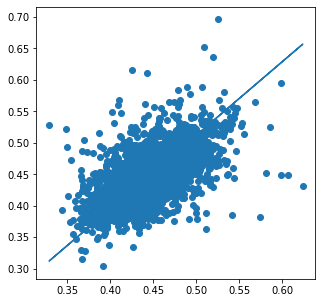

In [15]:
x = test[2015]
y = test[2016]

a, b = perform_odr(test, [2015, 2016])

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, a*x + b)

a, b

In [16]:
perform_odr(test, [2010, 2011])

Beta: [0.9294816 0.0414449]
Beta Std Error: [0.01465309 0.00634251]
Beta Covariance: [[ 0.53462742 -0.23070648]
 [-0.23070648  0.10016474]]
Residual Variance: 0.00040161231591846676
Inverse Condition #: 0.024109714713011654
Reason(s) for Halting:
  Sum of squares convergence


array([0.9294816, 0.0414449])